In [25]:
import pandas as pd
import numpy as np
import plotly.express as px

In [26]:
df = pd.read_excel("../data/Getting into the retrospective for DP&P(1-13).xlsx")

In [27]:
questions = df.columns.tolist()[6:]
num_questions = [col for col in questions if df[col].dtype != "O"]

In [28]:
df[num_questions].describe()

,I am aware that we depend on each other within my team to be able to deliver,I feel the rules we use for our way of working within the team are defined and agreed upon by the whole team,I do feel I belong to the team,"I feel that everyone, myself included, contributes to the care of the ambiance of the team.",With the other members of the team we share collective time which allows us to be united.,I feel I am at ease with the other team members,"I have the feeling disagreements/misunderstandings, conflicts are resolved through peaceful dialogue and contribute to the development of empathy within the team",I do feel I am supported,I feel I am in a safe environment,I feel that I am not judged or evaluated
count,13.000000,13.000000,13.00000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,5.538462,3.307692,4.00000,5.076923,3.615385,4.615385,3.615385,3.384615,4.615385,4.615385
std,0.776250,1.377474,1.47196,0.954074,1.502135,1.325296,1.445595,1.192928,1.502135,0.869718
min,4.000000,1.000000,2.00000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000
25%,5.000000,3.000000,3.00000,5.000000,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000
50%,6.000000,4.000000,4.00000,5.000000,4.000000,5.000000,4.000000,4.000000,5.000000,5.000000
75%,6.000000,4.000000,5.00000,6.000000,5.000000,6.000000,5.000000,4.000000,6.000000,5.000000
max,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,5.000000,6.000000,6.000000


In [29]:
def rescale_column(df: pd.DataFrame, col: str) -> pd.DataFrame:
    if df[col].max() > 3 or df[col].min() > 0:
        df[col] = np.where(df[col] > 3, df[col] - 3, df[col] - 4)
    return df

In [30]:
for q in num_questions:
    df = rescale_column(df, q)
df[num_questions].describe()

,I am aware that we depend on each other within my team to be able to deliver,I feel the rules we use for our way of working within the team are defined and agreed upon by the whole team,I do feel I belong to the team,"I feel that everyone, myself included, contributes to the care of the ambiance of the team.",With the other members of the team we share collective time which allows us to be united.,I feel I am at ease with the other team members,"I have the feeling disagreements/misunderstandings, conflicts are resolved through peaceful dialogue and contribute to the development of empathy within the team",I do feel I am supported,I feel I am in a safe environment,I feel that I am not judged or evaluated
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,2.538462,-0.153846,0.538462,2.000000,0.153846,1.384615,0.153846,-0.076923,1.384615,1.538462
std,0.776250,1.818706,1.941451,1.154701,1.951331,1.709701,1.908147,1.656379,1.894662,1.050031
min,1.000000,-3.000000,-2.000000,-1.000000,-3.000000,-2.000000,-3.000000,-3.000000,-3.000000,-1.000000
25%,2.000000,-1.000000,-1.000000,2.000000,-1.000000,1.000000,-1.000000,-1.000000,1.000000,1.000000
50%,3.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000
75%,3.000000,1.000000,2.000000,3.000000,2.000000,3.000000,2.000000,1.000000,3.000000,2.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000


In [31]:
# Add dummy structures
df["Team"] = ["D1_T1"] * 5 + ["D2_T1"] * 3 + ["D2_T2"] * 5

In [32]:
df.columns

Index(['ID', 'Heure de début', 'Heure de fin', 'Adresse de messagerie', 'Nom',
       'Heure de la dernière modification',
       'I am aware that we depend on each other within my team to be able to deliver',
       'I feel the rules we use for our way of working within the team are defined and agreed upon by the whole team',
       'I do feel I belong to the team',
       'I feel that everyone, myself included, contributes to the care of the ambiance of the team.',
       'With the other members of the team we share collective time which allows us to be united.',
       'I feel I am at ease with the other team members',
       'I have the feeling disagreements/misunderstandings, conflicts are resolved through peaceful dialogue and contribute to the development of empathy within the team',
       'I do feel I am supported', 'I feel I am in a safe environment',
       'I feel that I am not judged or evaluated', 'Your comments', 'Team'],
      dtype='object')

In [33]:
from importlib import reload
import utils

reload(utils)
from utils import *

In [35]:
dfx = (
    df[num_questions]
    .stack()
    .reset_index(name="Score")
    .groupby("level_1")["Score"]
    .value_counts()
    .reset_index(name="count")
)
dfxtmp = pd.DataFrame(
    list(product(dfx["level_1"].unique(), dfx["Score"].unique())),
    columns=["level_1", "Score"],
)
dfx = dfx.merge(dfxtmp, how="right").fillna(0)
dfx.rename(columns={"level_1": "Question"}, inplace=True)
dfx["Score"] = pd.Categorical(dfx["Score"], categories=[-3, -2, -1, 1, 2, 3])
dfx.sort_values(by="Score", inplace=True)

In [59]:
df[num_questions].mean()

I am aware that we depend on each other within my team to be able to deliver                                                                                         2.538462
I feel the rules we use for our way of working within the team are defined and agreed upon by the whole team                                                        -0.153846
I do feel I belong to the team                                                                                                                                       0.538462
I feel that everyone, myself included, contributes to the care of the ambiance of the team.                                                                          2.000000
With the other members of the team we share collective time which allows us to be united.                                                                            0.153846
I feel I am at ease with the other team members                                                                                   

In [65]:
dfx = df[num_questions].mean().reset_index(name="Avg. score")
dfx = pd.concat(
    [
        dfx.sort_values(by="Avg. score", ascending=True).head(3),
        dfx.sort_values(by="Avg. score", ascending=False).head(3),
    ]
)
dfx

,index,Avg. score
1,I feel the rules we use for our way of working...,-0.153846
7,I do feel I am supported,-0.076923
4,With the other members of the team we share co...,0.153846
0,I am aware that we depend on each other within...,2.538462
3,"I feel that everyone, myself included, contrib...",2.000000
9,I feel that I am not judged or evaluated,1.538462


In [67]:
dfx = df.copy(deep=True)
dfx.index = dfx["ID"]
dfx = (
    dfx[num_questions]
    .stack()
    .reset_index(name="Score")
    .groupby("ID")["Score"]
    .mean()
    .reset_index(name="Avg. score")
)
dfx

,ID,Avg. score
0,1,2.4
1,2,0.2
2,3,-0.4
3,4,0.7
4,5,-0.2
5,6,1.1
6,7,1.6
7,8,-0.1
8,9,1.0
9,10,0.8


In [12]:
dfx = dfx.reset_index()

In [15]:
dfx.columns

Index(['Question', -3, -2, -1, 1, 2, 3], dtype='object', name='Score')

<Axes: xlabel='Question'>

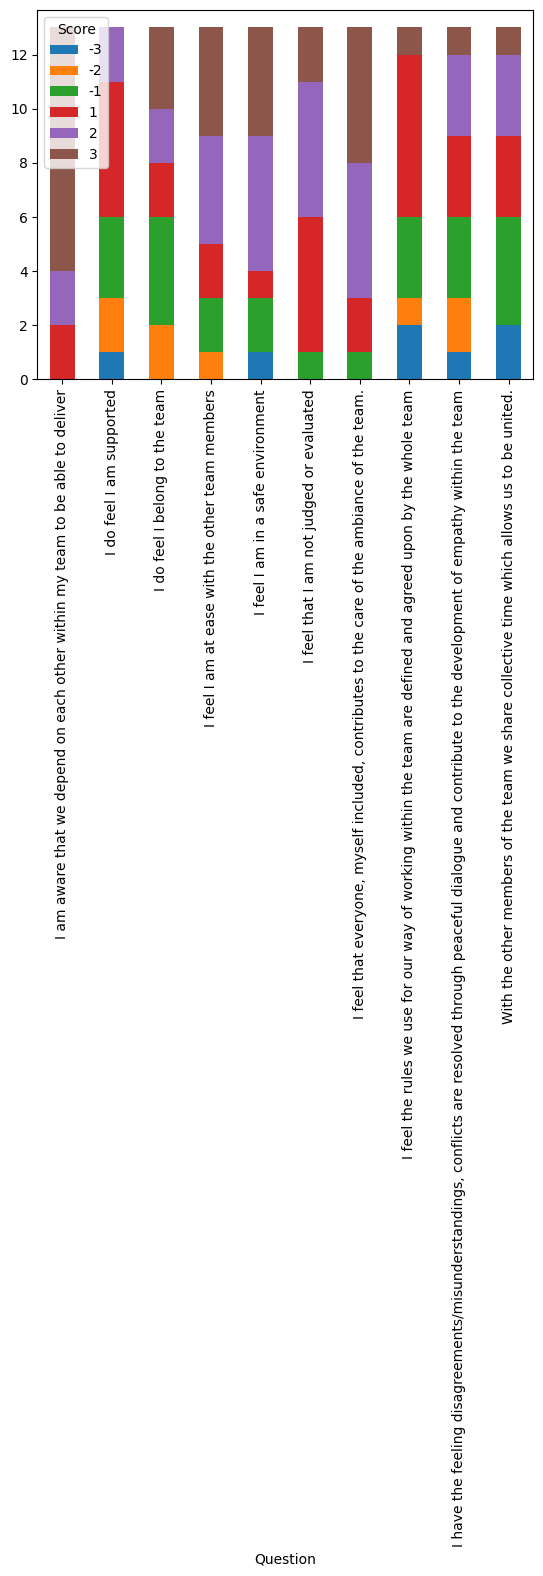

In [20]:
%matplotlib inline

dfx.plot.bar(x="Question", stacked=True)

In [12]:
from textwrap import wrap

x = "J'aime le caca boudin et les bonnes filles à la crème fraiche avec de l'huile d'olive."
"<br>".join(wrap(x, 50))

"J'aime le caca boudin et les bonnes filles à la<br>crème fraiche avec de l'huile d'olive."